# MO431A - Tarefa 1

Importanto bibliotecas necessárias.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

## 1 Importando a matriz do arquivo dados.npy para X

In [31]:
X = np.load('dados.npy')

## 2 Imprimindo as imagens dos 3 primeiros dígitos

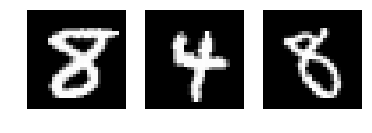

In [32]:
for i in range(3):
    imagem = X[i]
    imagem = np.reshape(imagem, (28, 28))
    plt.subplot(1, 3, i+1)
    plt.imshow(imagem, 'gray')
    plt.axis('off')
plt.show()

## 3 Aplicando fatoração SVD em X

* **Normalizando**

In [33]:
Xnorm = X - np.mean(X[:])

* **Aplicando em full matrix**

In [34]:
U, D, Vt = np.linalg.svd(Xnorm, full_matrices=True)
print(f'Tamanho das matrizes: U= {U.shape}, D= {D.shape}, Vt = {Vt.shape}.')

Tamanho das matrizes: U= (10500, 10500), D= (784,), Vt = (784, 784).


* **Aplicando em compacta**

In [35]:
Uc, Dc, Vtc = np.linalg.svd(Xnorm, full_matrices=False)
print(f'Tamanho das matrizes: U= {Uc.shape}, D= {Dc.shape}, Vt = {Vtc.shape}.')

Tamanho das matrizes: U= (10500, 784), D= (784,), Vt = (784, 784).


## 4 Aplicando SVD truncado

A função considera dados nas colunas, portanto é preciso utilizar a matriz transposta de X para calcular o SVD truncado, e depois utilizar a tranposta de X do SVD truncado.

In [36]:
#Xnormt = Xnorm.T
UDtrunc = TruncatedSVD(n_components=100)
Proj = UDtrunc.fit_transform(Xnorm)
#Proj = UDtrunct.components_.T
print(f'Tamanho da matriz projetada = {Proj.shape}.')

Tamanho da matriz projetada = (10500, 100).


In [37]:
Xrec = Proj @ UDtrunc.components_
print(f'Tamanho da matriz reconstruída = {Xrec.shape}.')

Tamanho da matriz reconstruída = (10500, 784).


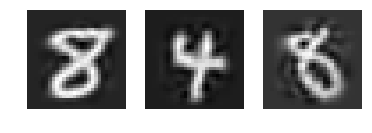

In [38]:
for i in range(3):
    imagem = Xrec[i]
    imagem = np.reshape(imagem, (28, 28))
    plt.subplot(1, 3, i+1)
    plt.imshow(imagem, 'gray')
    plt.axis('off')
plt.show()